### Retrieving in-situ soil moisture data

- This notebook demonstrates a possible workflow to retrieve in-situ soil moisture data provided by [Zentracloud](docs.zentracloud.com/l/en/category/wcao1f5pt0-zentra-api)

- We will focus on the regions of Buzi, Chokwé, Mabalane, Mabote, and Muanza in Mozambique



In [3]:
import datetime
import pandas as pd
import logging
from zentra.api import *
import matplotlib.pyplot as plt

- By using a specific token and serial number for each area we can retrieve the soil moisture data for specific areas 

In [ ]:
TOKEN = "hidden"

def fetch_soil_moisture_data():
    logging.info("Starting to fetch soil moisture data...")


    start_date = datetime.datetime(2023,5,1)
    end_date = datetime.datetime(2024,12,31)

    data_insitu_preloaded = {}
    data_serial_number = {
        "z6-21686": "Buzi",
        "z6-21685": "Chokwé",
        "z6-21669": "Mabalane",
        "z6-21671": "Mabote",
        "z6-21684": "Muanza",
    }
    

    for serial_number in data_serial_number:
        # Get the readings for a device
        readings = ZentraReadings(
            sn=serial_number,
            token=ZentraToken(token=TOKEN),
            start_time=int(start_date.timestamp()),
            end_time=int(end_date.timestamp())
        )

        # Report the readings from the first ZentraTimeseriesRecord
        df = readings.timeseries[0].values

        # Extract the soil moisture data from first port
        filtered_df = df[df["description"] == "Water Content"]
        filtered_df = filtered_df[filtered_df["port"].astype(int) == 2]

        # You can now process `filtered_df` or save it as needed
        data_insitu_preloaded[data_serial_number[serial_number]] = filtered_df
    logging.info(
        "All ZentraCloud stations connected to the server. In-situ data stored in dataframe."
    )
    return data_insitu_preloaded


In [ ]:
sensor_dfs = fetch_soil_moisture_data()

In [ ]:
import os

output_dirs = ["/home/jlinke/Documents/Geo/drysat/250603_present/insitu_output"]

for name, df in sensor_dfs.items():
    for output_dir in output_dirs:
        os.makedirs(output_dir, exist_ok=True)  # ensure directory exists
        file_path = f"{output_dir}/{name}_ground.csv"
        df.to_csv(file_path, index=False)


- To get a better understanding for the data we take a quick look at the dataframe and plot the soil moisture data over time

In [5]:
df = pd.read_csv("/home/jlinke/Documents/Geo/drysat/250603_present/insitu_output/Buzi_insitu.csv")

df

,datetime,mrid,rssi,port,value,units,error,description
0,2023-12-31 23:00:00+00:00,9066,55,2,0.224695,m³/m³,False,Water Content
1,2023-12-31 23:15:00+00:00,9067,55,2,0.224578,m³/m³,False,Water Content
2,2023-12-31 23:30:00+00:00,9068,55,2,0.224508,m³/m³,False,Water Content
3,2023-12-31 23:45:00+00:00,9069,55,2,0.224462,m³/m³,False,Water Content
4,2024-01-01 00:00:00+00:00,9070,55,2,0.224368,m³/m³,False,Water Content
...,...,...,...,...,...,...,...,...
17082,2024-12-30 19:00:00+00:00,26148,84,2,0.097370,m³/m³,False,Water Content
17083,2024-12-30 20:00:00+00:00,26149,84,2,0.097300,m³/m³,False,Water Content
17084,2024-12-30 21:00:00+00:00,26150,84,2,0.097194,m³/m³,False,Water Content
17085,2024-12-30 22:00:00+00:00,26151,84,2,0.097158,m³/m³,False,Water Content


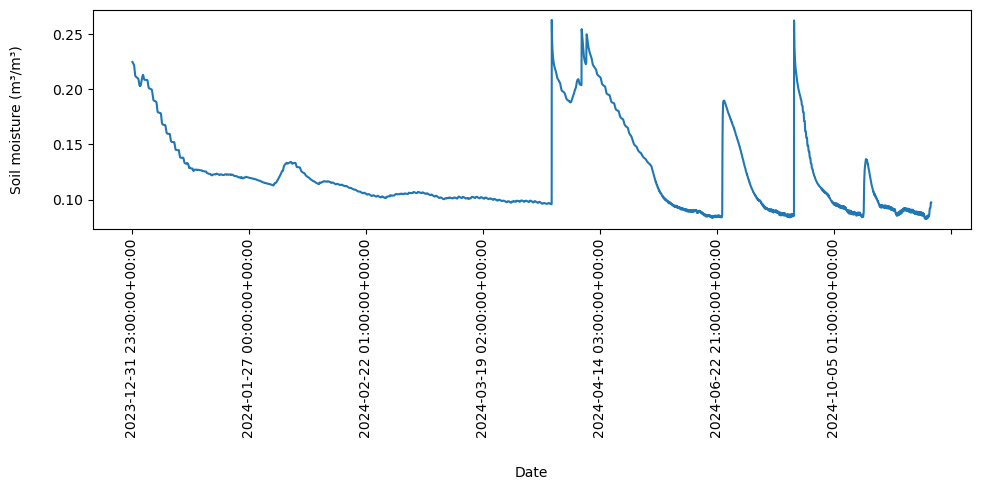

In [6]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt



ax = df.plot(x="datetime", y="value", figsize=(10, 5))

# Set a higher tick frequency: one tick every X days
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))  # <- Change 3 to whatever you want
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate and format
plt.xticks(rotation=90)
plt.xlabel("Date", labelpad=20)
plt.ylabel("Soil moisture (m³/m³)", labelpad=20)
ax.legend().remove()

plt.tight_layout()
plt.show()

